In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# !pip install lightgbm
# !pip install catboost

In [2]:
df = pd.read_csv("online_gaming_behavior_dataset.csv")

In [3]:
#Objective: Explore & Predict Player Engagement Patterns in Online Gaming

#Facors that may effect player engagement :

#age - older people have less free time to play
#Location - we can do EDA to see what countries, player retention is highest and determine reasoning
#GameGenre - what genres have highest game retentio and engagment, correlated with playerTimeHours etc
#etc - many factors to consider

In [4]:
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


<Axes: xlabel='EngagementLevel', ylabel='Age'>

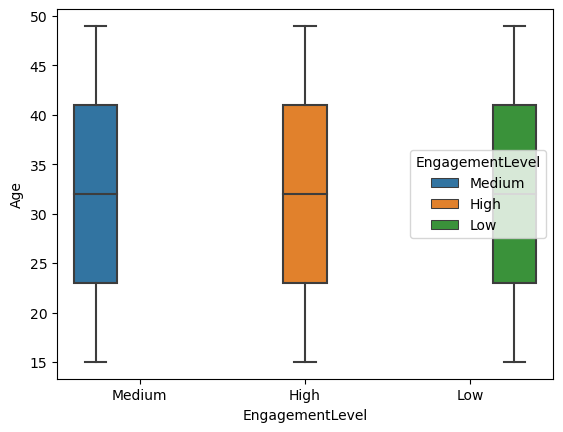

In [5]:
#EDA: Age
#Relation between features and the target variable

sns.boxplot(data=df, x="EngagementLevel",y="Age", hue="EngagementLevel")

In [6]:
#From this, Age range is the same for all levels of Engagement
#Possibly insignificantly impacts levels of Engagement in this dataset

<Axes: xlabel='EngagementLevel', ylabel='Age'>

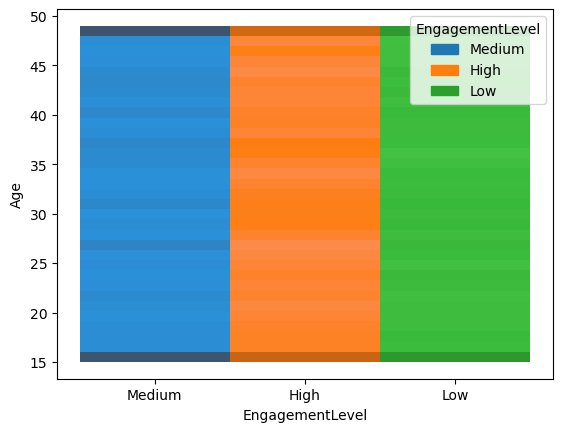

In [7]:
#Further Analyis into Age correlation :
sns.histplot(data=df, x="EngagementLevel", y="Age", hue="EngagementLevel")

<Axes: xlabel='Age', ylabel='Density'>

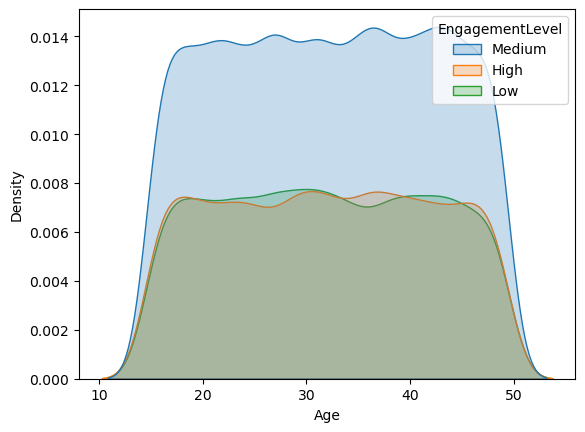

In [8]:
sns.kdeplot(data=df, x="Age", hue="EngagementLevel", fill=True)

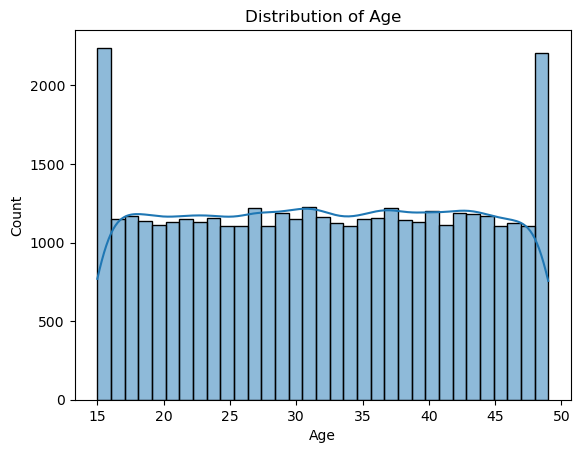

In [9]:
sns.histplot(data=df, x="Age", kde=True)
plt.title("Distribution of Age")
plt.show()

Text(0.5, 1.0, 'Age Boxplot')

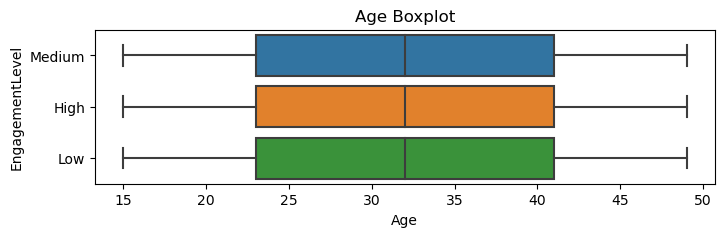

In [10]:
plt.figure(figsize=(8,2))
sns.boxplot(data=df, x="Age", y="EngagementLevel")
plt.title("Age Boxplot")

In [11]:
#Conclusion: Age is not a primary facctor influencing player engagement

#Feature Engineering to try:
# Grouping Age to see a correlation later

In [12]:
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


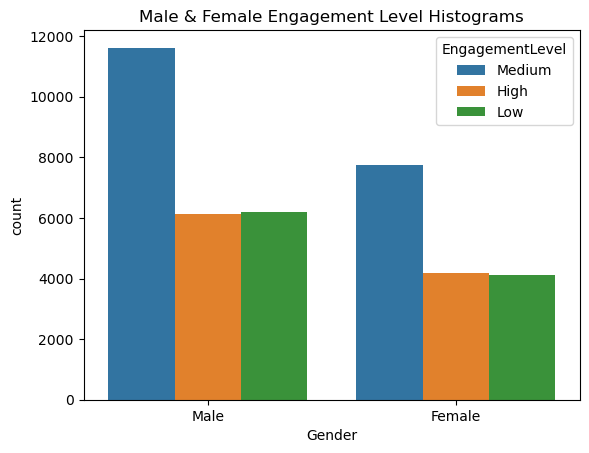

In [13]:
#EDA: Gender
sns.countplot(data=df, x="Gender", hue="EngagementLevel")
plt.title("Male & Female Engagement Level Histograms")
plt.show()

In [14]:
#This shows more males than females on average in the overall distribution

#Male have lower High Engagement compared to their Low Engagement
#Female have higher High Engagement compared to their Low Engagement
#Both Genders have significant number of players in the Medium Engagement level

In [15]:
#sns.displot(df, x="EngagementLevel", col="Gender")

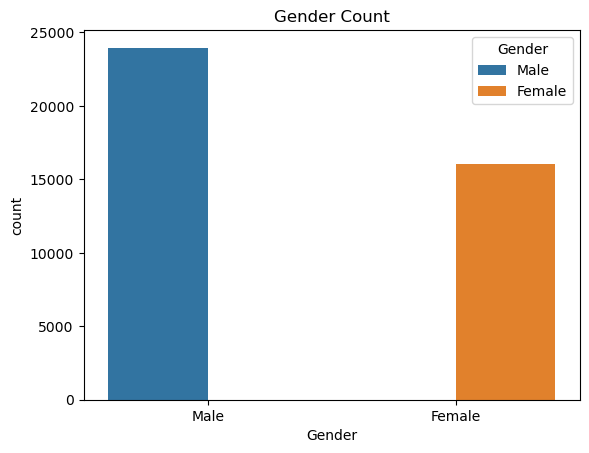

In [16]:
sns.countplot(data=df, x="Gender", hue="Gender")
plt.title("Gender Count")
plt.show()

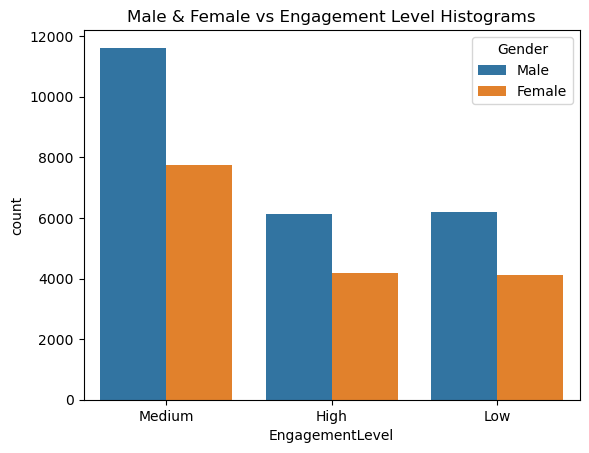

In [17]:
sns.countplot(data=df, x="EngagementLevel", hue="Gender")
plt.title("Male & Female vs Engagement Level Histograms")
plt.show()

In [18]:
#Gender Conclusion:

#Although grater percentage of all players are male, when comparing genders,
#the proportions of each Engagement Level are similar, showing
#No strong correlation and hence not useful as a independent predictor of Engagement Level in this dataset

In [19]:
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


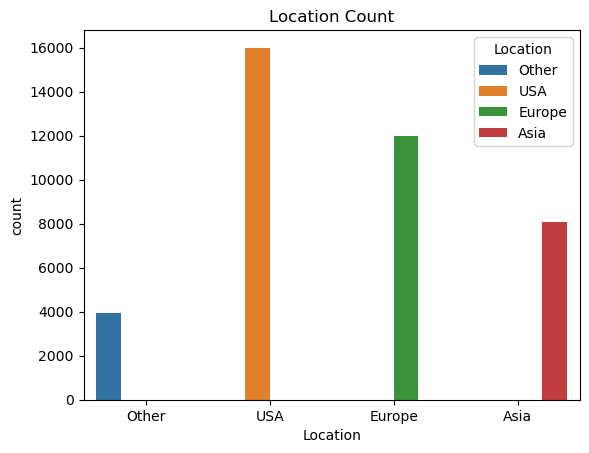

In [20]:
#EDA: Location

sns.countplot(data=df, x="Location", hue="Location")
plt.title("Location Count")
plt.show()

In [21]:
#Majority of players are in USA and Europe, so their influence will be greater, maybe worth categorising
#these and see if their is a correlation between that and other features ?

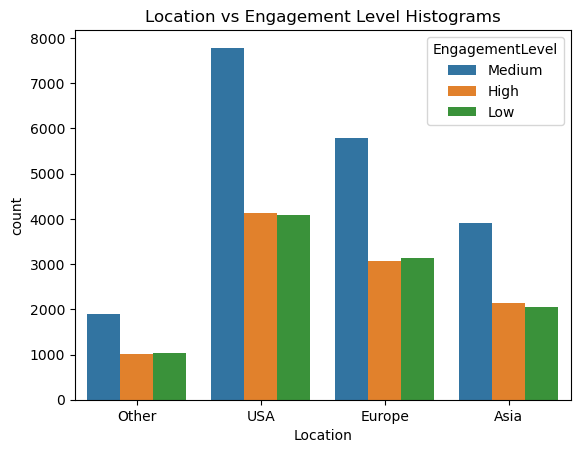

In [22]:
sns.countplot(data=df, x="Location", hue="EngagementLevel")
plt.title("Location vs Engagement Level Histograms")
plt.show()

In [23]:
#although slight variation between the locations, there isnt a pattern where one location has a high/low
#proportion of players in engagment levels compared to others

#Meaning: Not a strong independent predictor of player Engagement Level in this dataset

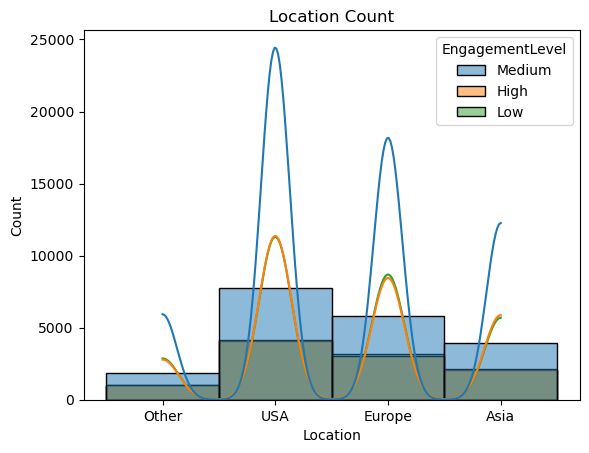

In [24]:
sns.histplot(data=df, x="Location", binwidth=1, kde=True, hue="EngagementLevel")
plt.title("Location Count")
plt.show()

In [25]:
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


<Axes: xlabel='GameGenre', ylabel='count'>

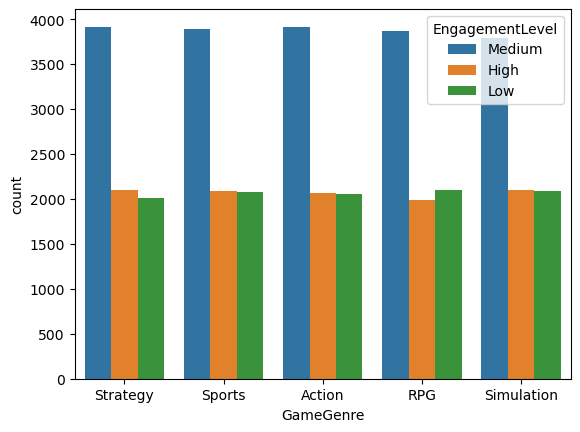

In [26]:
#EDA: GameGenre

sns.countplot(data=df, x="GameGenre", hue="EngagementLevel")

<Axes: xlabel='GameGenre', ylabel='count'>

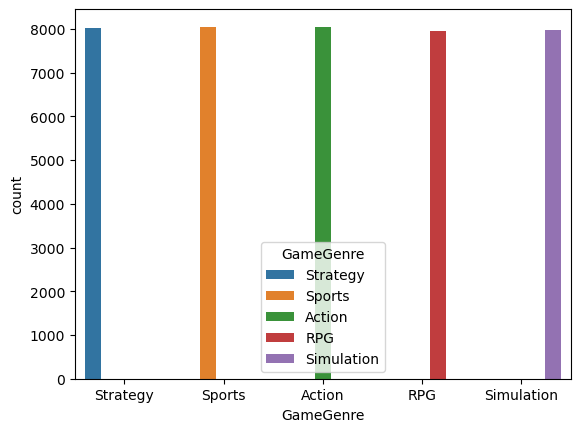

In [27]:
sns.countplot(data=df, x="GameGenre", hue="GameGenre")

In [28]:
df["GameGenre"].value_counts()

GameGenre
Sports        8048
Action        8039
Strategy      8012
Simulation    7983
RPG           7952
Name: count, dtype: int64

In [29]:
#Similar with Age, Location, Gender,
#GameGenre doesnt have a strong independent correlation with Engagement Level

In [30]:
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


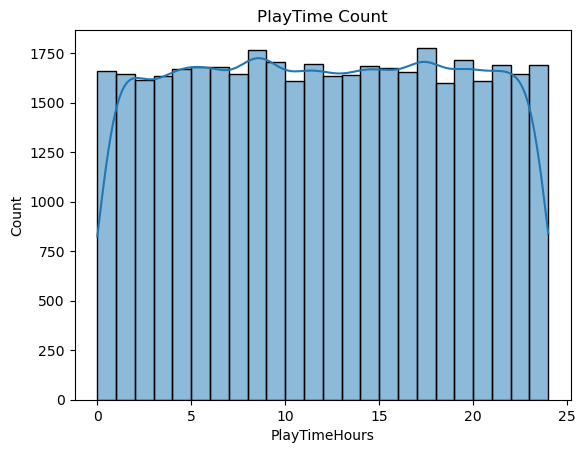

In [31]:
#EDA: PlayTimeHours

sns.histplot(data=df, x="PlayTimeHours", binwidth=1, kde=True)
plt.title("PlayTime Count")
plt.show()

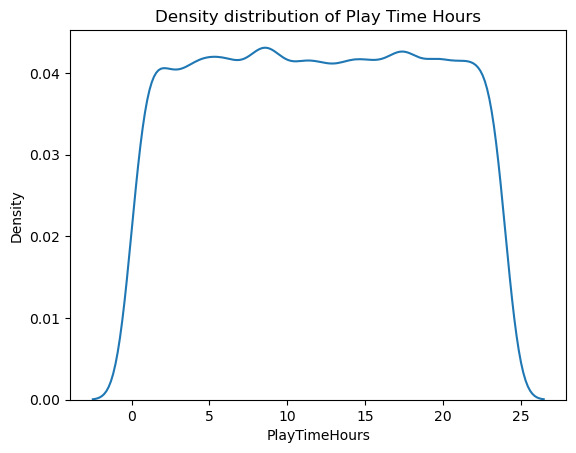

In [32]:
sns.kdeplot(data=df, x="PlayTimeHours")
plt.title("Density distribution of Play Time Hours")
plt.show()

<Axes: xlabel='PlayTimeHours', ylabel='EngagementLevel'>

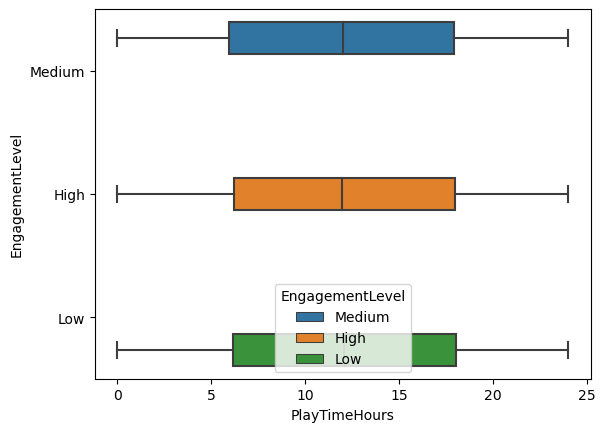

In [33]:
sns.boxplot(data=df, x="PlayTimeHours", y="EngagementLevel", hue="EngagementLevel")

<Axes: xlabel='PlayTimeHours', ylabel='Density'>

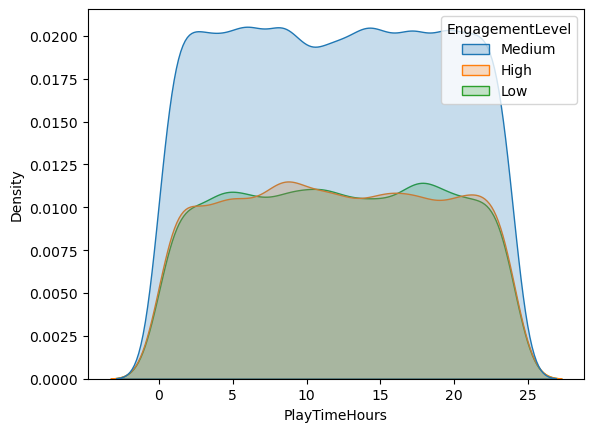

In [34]:
sns.kdeplot(data=df, x="PlayTimeHours", hue="EngagementLevel", fill=True)

In [35]:
import scipy.stats as stats

# One-way ANOVA test
f_stat, p_value = stats.f_oneway(
    df[df['EngagementLevel']=='High']['PlayTimeHours'],
    df[df['EngagementLevel']=='Medium']['PlayTimeHours'],
    df[df['EngagementLevel']=='Low']['PlayTimeHours']
)

print(f"p = {p_value}")

p = 0.1613962777558119


In [36]:
#Conclusion:
#no correlation
# p=0.16>>0.05 so cant reject null hypothesis they they are the same

In [37]:
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


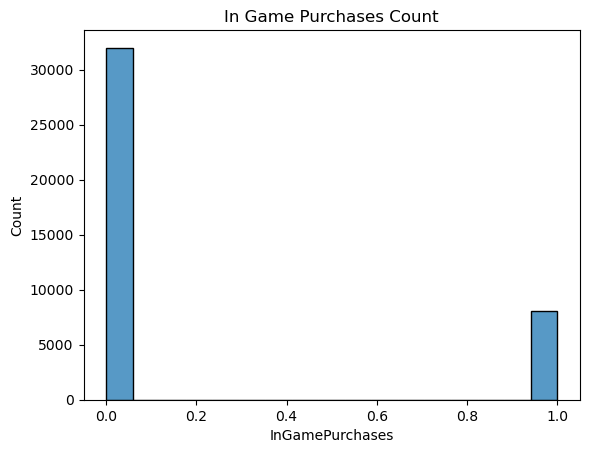

In [38]:
sns.histplot(data=df, x="InGamePurchases")
plt.title("In Game Purchases Count")
plt.show()

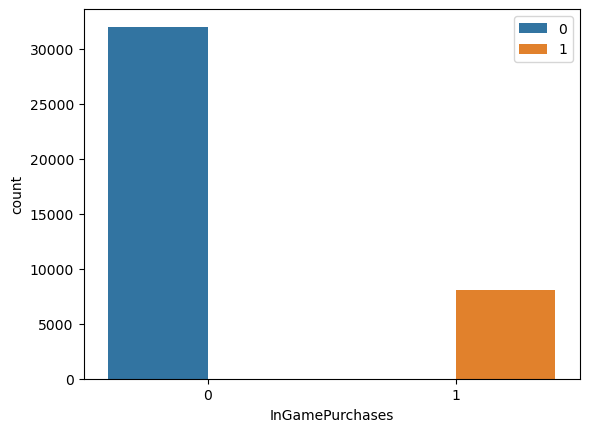

In [39]:
sns.countplot(data=df, x="InGamePurchases", hue="InGamePurchases")
plt.legend()

<Axes: xlabel='EngagementLevel', ylabel='count'>

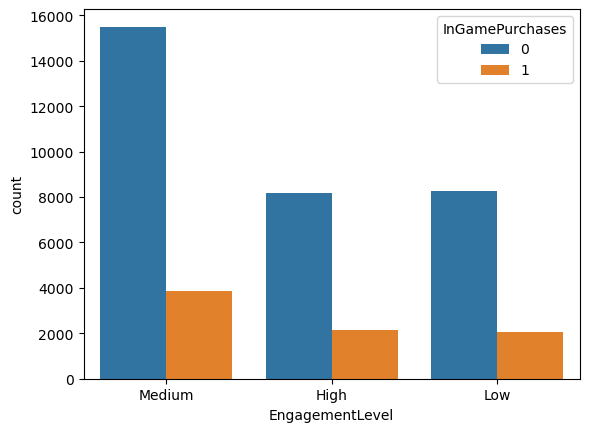

In [40]:
sns.countplot(data=df, x="EngagementLevel", hue="InGamePurchases")

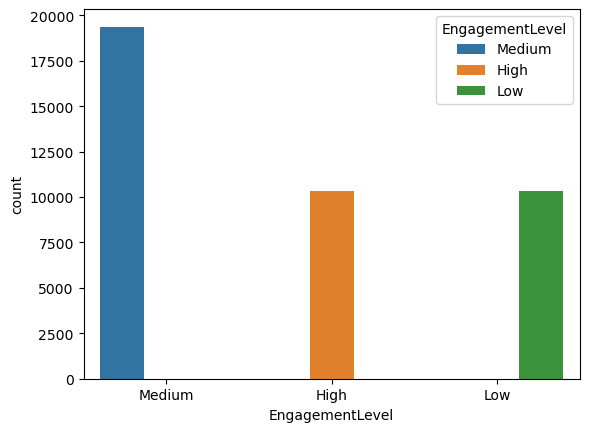

In [41]:
sns.countplot(data=df, x="EngagementLevel", hue="EngagementLevel")
plt.show()

In [42]:
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


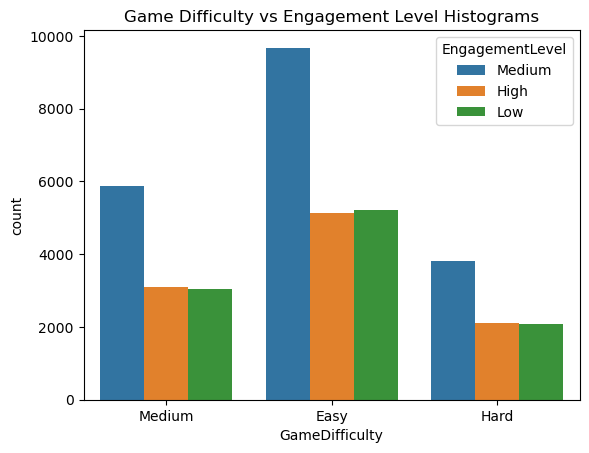

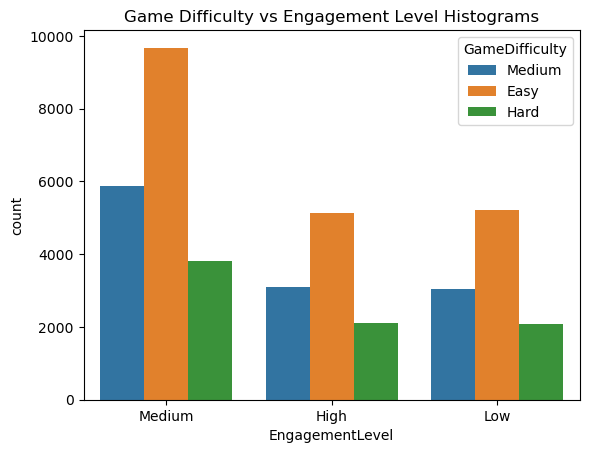

In [43]:
#EDA: GameDifficulty:

sns.countplot(data=df, x="GameDifficulty", hue="EngagementLevel")
plt.title("Game Difficulty vs Engagement Level Histograms")
plt.show()

sns.countplot(data=df, hue="GameDifficulty", x="EngagementLevel")
plt.title("Game Difficulty vs Engagement Level Histograms")
plt.show()

In [44]:
#Conclusion:

#If GameDifficulty has a strong impact on EngagementLevel, expectation is to see difference in the distribution
#e.g. High engagement level players proportionally / disproportionately found frequently in "Hard"/"Easy"
#etc... However, plots dont suggest any of this,
#Regardless on players difficulty modes, show a similar distribution between each engagement level
#and game difficulty (same shape graphs)

#So, GameDifficulty does not have a strong independent correlation with EngagementLevel in this dataset.
#Not a primary factor determing overall engagement level across the dataset.


In [45]:
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


<Axes: xlabel='SessionsPerWeek', ylabel='EngagementLevel'>

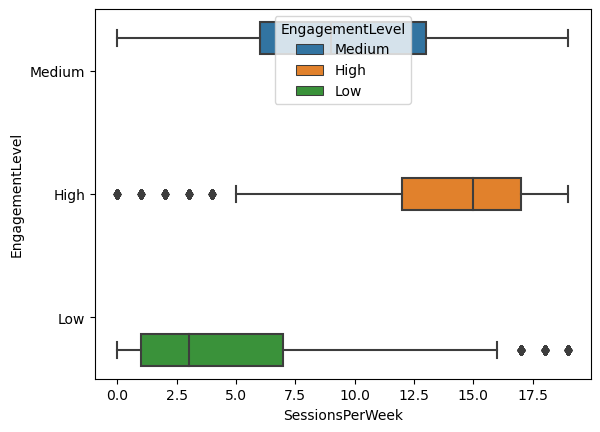

In [46]:
#Now EDA: SessionsPerWeek

df[["SessionsPerWeek", "EngagementLevel"]]

sns.boxplot(data=df, x="SessionsPerWeek", y="EngagementLevel", hue="EngagementLevel")

In [47]:
#THIS is signficant plot,
#Shows each EngagementLevel have different sessionsPerWeek,
#SO, there is a strong correlation, and hence is a huge factor when passing data through a ml model

<Axes: xlabel='EngagementLevel', ylabel='SessionsPerWeek'>

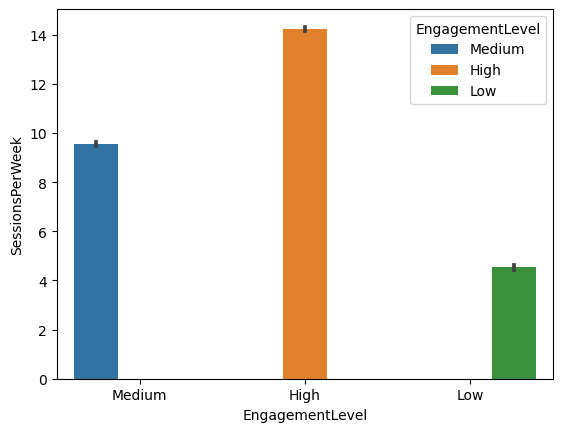

In [48]:
sns.barplot(data=df, x="EngagementLevel", y="SessionsPerWeek", hue="EngagementLevel")

In [49]:
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


<Axes: xlabel='AvgSessionDurationMinutes'>

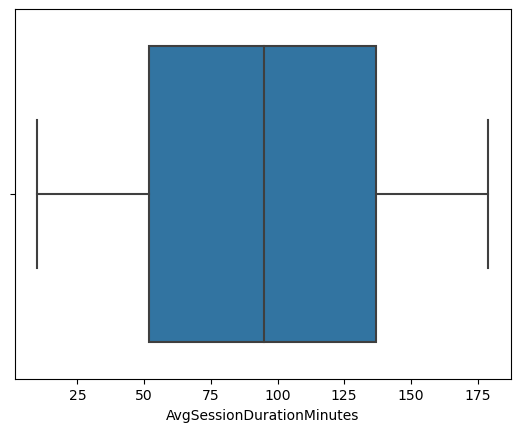

In [50]:
#EDA: AvgSessionDurationMinutes

sns.boxplot(data=df, x="AvgSessionDurationMinutes", hue="EngagementLevel")

<Axes: xlabel='EngagementLevel', ylabel='AvgSessionDurationMinutes'>

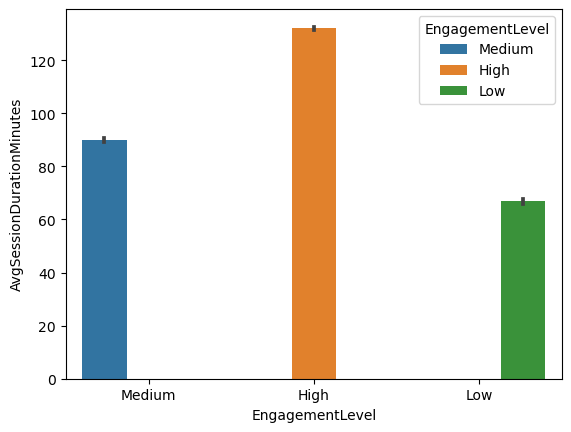

In [51]:
sns.barplot(data=df, x="EngagementLevel", y="AvgSessionDurationMinutes", hue="EngagementLevel")

<Axes: xlabel='AvgSessionDurationMinutes', ylabel='Count'>

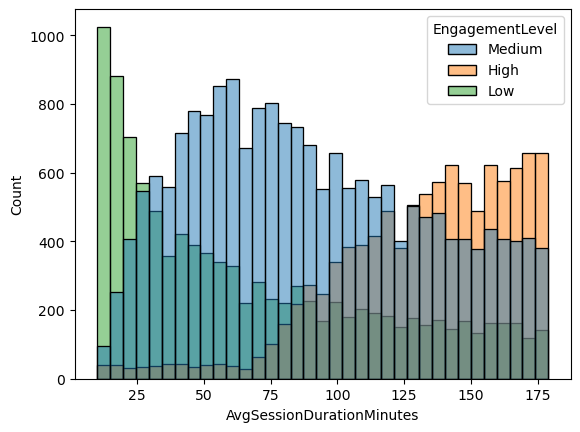

In [52]:
sns.histplot(data=df, x="AvgSessionDurationMinutes", hue="EngagementLevel")

<Axes: xlabel='AvgSessionDurationMinutes', ylabel='Density'>

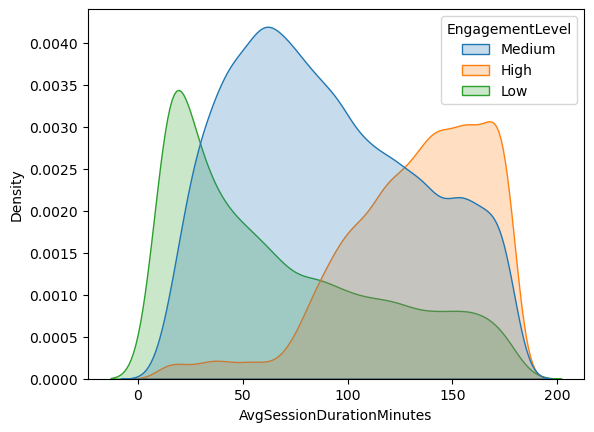

In [53]:
sns.kdeplot(data=df, x="AvgSessionDurationMinutes", hue="EngagementLevel", fill=True)

In [54]:
#Conclusion: AvgSessionDurationMinutes

#Shown above, AvgSessionDurationMinutes is positively correlated with EngagementLevel

#Players with higher AvgSessionDurationMinutes tend to have higher engagement levels

#AvgSessionDurationMinutes appears to be a valuable feature for predicting player engagement

In [55]:
#EDA: PlayerLevel,

df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [56]:
df[["PlayerLevel", "EngagementLevel"]]

,PlayerLevel,EngagementLevel
0,79,Medium
1,11,Medium
2,35,High
3,57,Medium
4,95,Medium
...,...,...
40029,85,Medium
40030,71,High
40031,29,High
40032,70,Medium


In [57]:
df["PlayerLevel"].mean()

49.65556776739771

In [58]:
#Feature engineering on this - group

In [59]:
df

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,49029,32,Male,USA,Strategy,20.619662,0,Easy,4,75,85,14,Medium
40030,49030,44,Female,Other,Simulation,13.539280,0,Hard,19,114,71,27,High
40031,49031,15,Female,USA,RPG,0.240057,1,Easy,10,176,29,1,High
40032,49032,34,Male,USA,Sports,14.017818,1,Medium,3,128,70,10,Medium


In [60]:
print(df["PlayerLevel"].isnull().sum())

0


In [61]:
df["PlayerLevel"].fillna(df["PlayerLevel"].mean(), inplace=True)

In [62]:
print(df["PlayerLevel"].isnull().sum())

0


Text(0.5, 1.0, 'PlayerLevel BoxPlot')

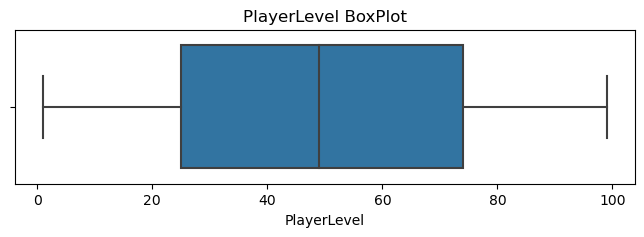

In [63]:
plt.figure(figsize=(8,2))
sns.boxplot(data=df, x="PlayerLevel")
plt.title("PlayerLevel BoxPlot")

In [64]:
print(df["PlayerLevel"].mean())

49.65556776739771


In [65]:
# Create the new categorical column

df["PlayerLevel_Category"] = pd.cut(df["PlayerLevel"], bins=[0, 20, 40, 60, 80, 100], labels=["Novice", "Beginner", "Intermediate", "High", "Pro"], right=False)

display(df["PlayerLevel_Category"].value_counts())

PlayerLevel_Category
Intermediate    8179
Beginner        8070
Pro             7995
Novice          7903
High            7887
Name: count, dtype: int64

In [66]:
print(df["PlayerLevel_Category"].value_counts())

PlayerLevel_Category
Intermediate    8179
Beginner        8070
Pro             7995
Novice          7903
High            7887
Name: count, dtype: int64


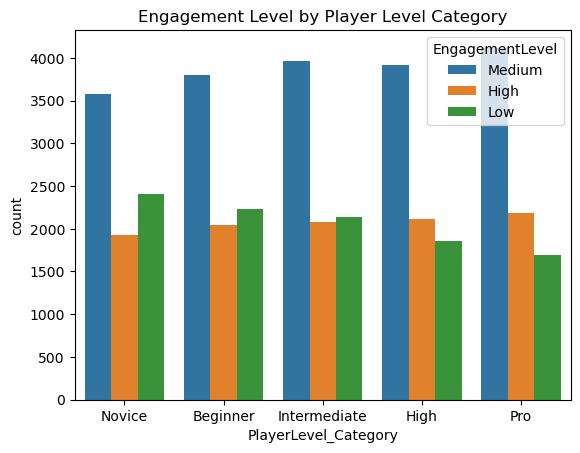

In [67]:
df["PlayerLevel_Category"].head()

sns.countplot(data=df, x="PlayerLevel_Category", hue="EngagementLevel")
plt.title("Engagement Level by Player Level Category")
plt.show()

In [68]:
#This shows that the High and Medium EngagementLevel are highest towards the more the PlayerLevel_Category
#Moves up from Novice up to Pro, whilst the Low EngagementLevel decreases.

#This reinforces the finding from the boxplot that PlayerLevel is correlated with EngagementLevel,
# and specifically highlights how the categorical grouping of player levels can reveal this trend.

<Axes: xlabel='PlayerLevel', ylabel='EngagementLevel'>

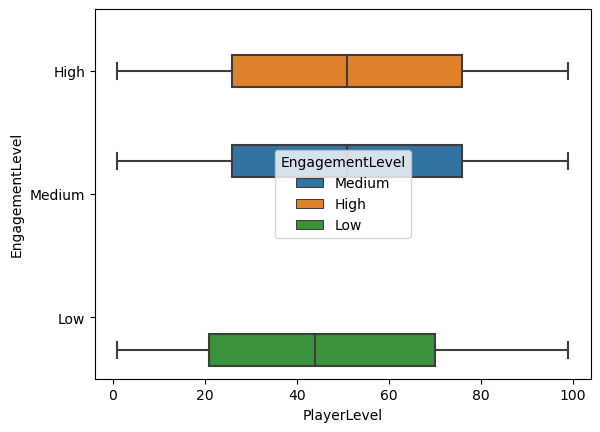

In [69]:
sns.boxplot(data=df, x="PlayerLevel", y="EngagementLevel", hue="EngagementLevel", order=["High", "Medium", "Low"])

In [70]:
#Low engagement group indicates that player level is not entirely independent of engagement.
# Lower player levels appear to be more associated with lower engagement

In [71]:
# Find the number of missing values in the 'PlayerLevel' column
missing_player_levels = df['PlayerLevel'].isnull().sum()
print(f"Number of missing values in 'PlayerLevel': {missing_player_levels}")

Number of missing values in 'PlayerLevel': 0


In [72]:
#EDA: AchievementsUnlocked

df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel,PlayerLevel_Category
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium,High
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium,Novice
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High,Beginner
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium,Intermediate
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium,Pro


<Axes: xlabel='AchievementsUnlocked', ylabel='count'>

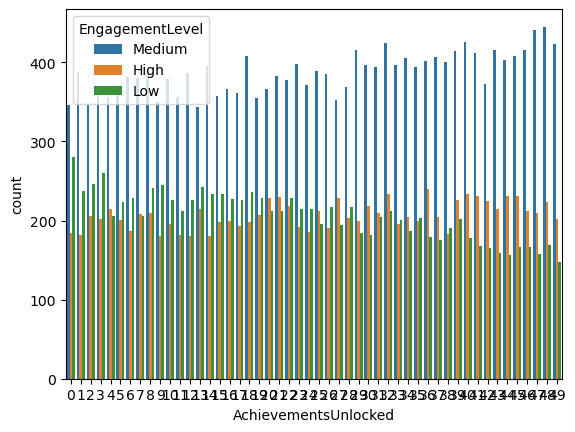

In [73]:
sns.countplot(data=df, x="AchievementsUnlocked", hue="EngagementLevel")

<Axes: xlabel='AchievementsUnlocked', ylabel='Count'>

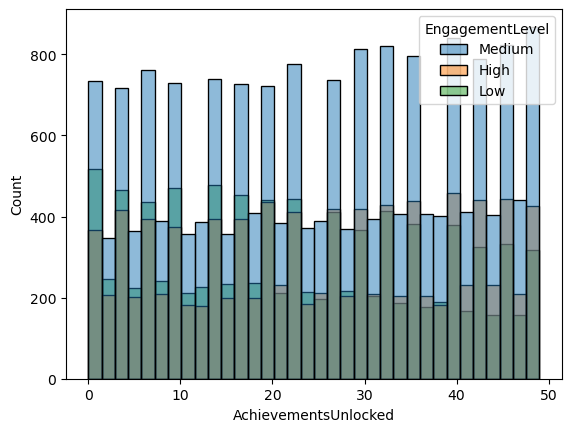

In [74]:
sns.histplot(data=df, x="AchievementsUnlocked", hue="EngagementLevel")

<Axes: xlabel='AchievementsUnlocked', ylabel='Density'>

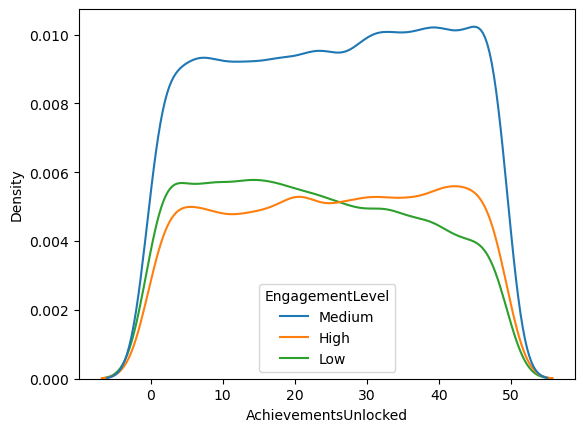

In [75]:
sns.kdeplot(data=df, x="AchievementsUnlocked", hue="EngagementLevel")

<Axes: xlabel='AchievementsUnlocked', ylabel='EngagementLevel'>

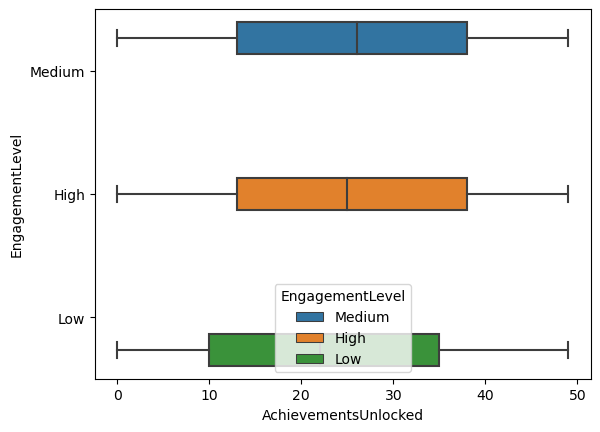

In [76]:
sns.boxplot(data=df, x="AchievementsUnlocked", y="EngagementLevel", hue="EngagementLevel")

In [77]:
#So, AchievementsUnlocked is correlated with EngagementLevel

In [78]:
#Data PreProcessing:

#Turn Categorical Data -> 0,1 (Encoding it) for Algorithm to understand:

#1: Gender = OneHotEncoding

#2: Location

#3: GameGenre

#4: EngagementLevel -> Label Encoding

#2: Numerical Features: Feature Scailing - StandardScale/MinMaxScaler - for similar ranges - to improve performance
#For certain models based on distance metric, e.g. KNN or SVM

#3: Splitting the DATA:

#Trainig Set: 80% of total data
#Testing Set - common split: 20%


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   PlayerID                   40034 non-null  int64   
 1   Age                        40034 non-null  int64   
 2   Gender                     40034 non-null  object  
 3   Location                   40034 non-null  object  
 4   GameGenre                  40034 non-null  object  
 5   PlayTimeHours              40034 non-null  float64 
 6   InGamePurchases            40034 non-null  int64   
 7   GameDifficulty             40034 non-null  object  
 8   SessionsPerWeek            40034 non-null  int64   
 9   AvgSessionDurationMinutes  40034 non-null  int64   
 10  PlayerLevel                40034 non-null  int64   
 11  AchievementsUnlocked       40034 non-null  int64   
 12  EngagementLevel            40034 non-null  object  
 13  PlayerLevel_Category       4003

In [79]:
#OneHotEncoding Gender column using pd.get_dummies

male = pd.get_dummies(df["Gender"], drop_first=True).astype(int)

In [80]:
male

,Male
0,1
1,0
2,0
3,1
4,1
...,...
40029,1
40030,0
40031,0
40032,1


In [81]:
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel,PlayerLevel_Category
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium,High
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium,Novice
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High,Beginner
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium,Intermediate
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium,Pro


In [82]:
df.drop("Gender", axis=1, inplace=True)

In [83]:
df = pd.concat([df, male], axis=1)

In [84]:
df

,PlayerID,Age,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel,PlayerLevel_Category,Male
0,9000,43,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium,High,1
1,9001,29,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium,Novice,0
2,9002,22,USA,Sports,8.223755,0,Easy,16,142,35,41,High,Beginner,0
3,9003,35,USA,Action,5.265351,1,Easy,9,85,57,47,Medium,Intermediate,1
4,9004,33,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium,Pro,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,49029,32,USA,Strategy,20.619662,0,Easy,4,75,85,14,Medium,Pro,1
40030,49030,44,Other,Simulation,13.539280,0,Hard,19,114,71,27,High,High,0
40031,49031,15,USA,RPG,0.240057,1,Easy,10,176,29,1,High,Beginner,0
40032,49032,34,USA,Sports,14.017818,1,Medium,3,128,70,10,Medium,High,1


In [85]:
#Ordinal Encoding:
difficulty_map = {"Easy":0 , "Medium":1 , "Hard": 2}
df["GameDifficulty"] = df["GameDifficulty"].map(difficulty_map)

In [86]:
df

,PlayerID,Age,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel,PlayerLevel_Category,Male
0,9000,43,Other,Strategy,16.271119,0,1,6,108,79,25,Medium,High,1
1,9001,29,USA,Strategy,5.525961,0,1,5,144,11,10,Medium,Novice,0
2,9002,22,USA,Sports,8.223755,0,0,16,142,35,41,High,Beginner,0
3,9003,35,USA,Action,5.265351,1,0,9,85,57,47,Medium,Intermediate,1
4,9004,33,Europe,Action,15.531945,0,1,2,131,95,37,Medium,Pro,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,49029,32,USA,Strategy,20.619662,0,0,4,75,85,14,Medium,Pro,1
40030,49030,44,Other,Simulation,13.539280,0,2,19,114,71,27,High,High,0
40031,49031,15,USA,RPG,0.240057,1,0,10,176,29,1,High,Beginner,0
40032,49032,34,USA,Sports,14.017818,1,1,3,128,70,10,Medium,High,1


In [87]:
#Encode target var
engagement_mapping = {"Low":0 , "Medium":1 , "High": 2}
df["EngagementLevel"] = df["EngagementLevel"].map(engagement_mapping)

In [88]:
df

,PlayerID,Age,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel,PlayerLevel_Category,Male
0,9000,43,Other,Strategy,16.271119,0,1,6,108,79,25,1,High,1
1,9001,29,USA,Strategy,5.525961,0,1,5,144,11,10,1,Novice,0
2,9002,22,USA,Sports,8.223755,0,0,16,142,35,41,2,Beginner,0
3,9003,35,USA,Action,5.265351,1,0,9,85,57,47,1,Intermediate,1
4,9004,33,Europe,Action,15.531945,0,1,2,131,95,37,1,Pro,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,49029,32,USA,Strategy,20.619662,0,0,4,75,85,14,1,Pro,1
40030,49030,44,Other,Simulation,13.539280,0,2,19,114,71,27,2,High,0
40031,49031,15,USA,RPG,0.240057,1,0,10,176,29,1,2,Beginner,0
40032,49032,34,USA,Sports,14.017818,1,1,3,128,70,10,1,High,1


In [89]:
#OneHotEncoding Location

df = pd.get_dummies(df, columns=["Location"], prefix="Location", drop_first=True)

In [90]:
#OneHotEncoding GameGenre

df = pd.get_dummies(df, columns=["GameGenre"], prefix="Genre", drop_first=True)

In [91]:
df

,PlayerID,Age,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel,PlayerLevel_Category,Male,Location_Europe,Location_Other,Location_USA,Genre_RPG,Genre_Simulation,Genre_Sports,Genre_Strategy
0,9000,43,16.271119,0,1,6,108,79,25,1,High,1,False,True,False,False,False,False,True
1,9001,29,5.525961,0,1,5,144,11,10,1,Novice,0,False,False,True,False,False,False,True
2,9002,22,8.223755,0,0,16,142,35,41,2,Beginner,0,False,False,True,False,False,True,False
3,9003,35,5.265351,1,0,9,85,57,47,1,Intermediate,1,False,False,True,False,False,False,False
4,9004,33,15.531945,0,1,2,131,95,37,1,Pro,1,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,49029,32,20.619662,0,0,4,75,85,14,1,Pro,1,False,False,True,False,False,False,True
40030,49030,44,13.539280,0,2,19,114,71,27,2,High,0,False,True,False,False,True,False,False
40031,49031,15,0.240057,1,0,10,176,29,1,2,Beginner,0,False,False,True,True,False,False,False
40032,49032,34,14.017818,1,1,3,128,70,10,1,High,1,False,False,True,False,False,True,False


In [92]:
#PlayerLevel_Category: useful during EDA, visualisations, but I already have original numerical PlayerLevel,
#So drop it:

df.drop("PlayerLevel_Category",axis=1, inplace=True)

In [93]:
df.isnull().sum()

PlayerID                     0
Age                          0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
Male                         0
Location_Europe              0
Location_Other               0
Location_USA                 0
Genre_RPG                    0
Genre_Simulation             0
Genre_Sports                 0
Genre_Strategy               0
dtype: int64

In [94]:
#Importing LabelEncoder from scikit-learn, to encode our target variable:

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df["EngagementLevel_encoded"] = label_encoder.fit_transform(df["EngagementLevel"])

In [95]:
df

,PlayerID,Age,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel,Male,Location_Europe,Location_Other,Location_USA,Genre_RPG,Genre_Simulation,Genre_Sports,Genre_Strategy,EngagementLevel_encoded
0,9000,43,16.271119,0,1,6,108,79,25,1,1,False,True,False,False,False,False,True,1
1,9001,29,5.525961,0,1,5,144,11,10,1,0,False,False,True,False,False,False,True,1
2,9002,22,8.223755,0,0,16,142,35,41,2,0,False,False,True,False,False,True,False,2
3,9003,35,5.265351,1,0,9,85,57,47,1,1,False,False,True,False,False,False,False,1
4,9004,33,15.531945,0,1,2,131,95,37,1,1,True,False,False,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,49029,32,20.619662,0,0,4,75,85,14,1,1,False,False,True,False,False,False,True,1
40030,49030,44,13.539280,0,2,19,114,71,27,2,0,False,True,False,False,True,False,False,2
40031,49031,15,0.240057,1,0,10,176,29,1,2,0,False,False,True,True,False,False,False,2
40032,49032,34,14.017818,1,1,3,128,70,10,1,1,False,False,True,False,False,True,False,1


In [96]:
engagement_equal = df["EngagementLevel_encoded"] == df["EngagementLevel"]

engagement_equal.value_counts()

True    40034
Name: count, dtype: int64

In [97]:
df.drop("EngagementLevel_encoded", axis=1, inplace=True)

In [98]:
df

,PlayerID,Age,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel,Male,Location_Europe,Location_Other,Location_USA,Genre_RPG,Genre_Simulation,Genre_Sports,Genre_Strategy
0,9000,43,16.271119,0,1,6,108,79,25,1,1,False,True,False,False,False,False,True
1,9001,29,5.525961,0,1,5,144,11,10,1,0,False,False,True,False,False,False,True
2,9002,22,8.223755,0,0,16,142,35,41,2,0,False,False,True,False,False,True,False
3,9003,35,5.265351,1,0,9,85,57,47,1,1,False,False,True,False,False,False,False
4,9004,33,15.531945,0,1,2,131,95,37,1,1,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,49029,32,20.619662,0,0,4,75,85,14,1,1,False,False,True,False,False,False,True
40030,49030,44,13.539280,0,2,19,114,71,27,2,0,False,True,False,False,True,False,False
40031,49031,15,0.240057,1,0,10,176,29,1,2,0,False,False,True,True,False,False,False
40032,49032,34,14.017818,1,1,3,128,70,10,1,1,False,False,True,False,False,True,False


In [99]:
display(df["EngagementLevel"].isnull().sum())

print()

# Check the unique values for encoded features
encoded_features = ['Male', 'GameDifficulty', 'EngagementLevel',
                    'Location_Europe', 'Location_Other', 'Location_USA',
                    'Genre_RPG', 'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy']

unique_values = {feature: df[feature].unique() for feature in encoded_features}

# Display the unique values for each encoded feature
unique_values

0

{'Male': array([1, 0]),
 'GameDifficulty': array([1, 0, 2], dtype=int64),
 'EngagementLevel': array([1, 2, 0], dtype=int64),
 'Location_Europe': array([False,  True]),
 'Location_Other': array([ True, False]),
 'Location_USA': array([False,  True]),
 'Genre_RPG': array([False,  True]),
 'Genre_Simulation': array([False,  True]),
 'Genre_Sports': array([False,  True]),
 'Genre_Strategy': array([ True, False])}

In [100]:
df.corr()

,PlayerID,Age,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel,Male,Location_Europe,Location_Other,Location_USA,Genre_RPG,Genre_Simulation,Genre_Sports,Genre_Strategy
PlayerID,1.000000,-0.003044,0.000923,0.002321,0.004736,-0.005944,-0.001801,-0.001769,0.003190,-0.001926,-0.001847,0.001017,0.000211,-0.002832,0.001553,0.003939,-0.007152,0.000972
Age,-0.003044,1.000000,0.002462,-0.000186,-0.002760,0.008777,-0.002269,0.001353,-0.001100,0.000824,-0.002075,-0.011977,-0.000991,0.008751,-0.008900,0.009609,0.000075,0.001205
PlayTimeHours,0.000923,0.002462,1.000000,-0.006067,0.001636,-0.003655,-0.001925,-0.005152,0.003913,-0.001849,0.006514,-0.008799,0.001748,-0.002989,-0.001170,-0.009115,-0.004065,0.004159
InGamePurchases,0.002321,-0.000186,-0.006067,1.000000,0.001410,0.005132,-0.003059,0.006524,0.000098,0.008209,0.006198,0.004347,-0.006358,-0.004540,-0.003312,0.001027,0.000859,0.011026
GameDifficulty,0.004736,-0.002760,0.001636,0.001410,1.000000,0.005058,0.002374,0.006059,-0.006244,0.005057,0.001878,0.002599,-0.001699,-0.000018,0.011380,0.000501,-0.001855,-0.000723
SessionsPerWeek,-0.005944,0.008777,-0.003655,0.005132,0.005058,1.000000,-0.000620,0.003257,0.003187,0.605996,-0.006491,0.001219,-0.001680,-0.001269,-0.005698,-0.002714,0.002229,0.006068
AvgSessionDurationMinutes,-0.001801,-0.002269,-0.001925,-0.003059,0.002374,-0.000620,1.000000,0.001368,-0.002227,0.476698,-0.003175,-0.008134,0.001021,0.006618,-0.010669,-0.000536,0.002598,0.008668
PlayerLevel,-0.001769,0.001353,-0.005152,0.006524,0.006059,0.003257,0.001368,1.000000,0.006343,0.059315,0.006645,-0.009553,0.006079,0.002551,-0.003866,-0.007161,0.004127,0.004286
AchievementsUnlocked,0.003190,-0.001100,0.003913,0.000098,-0.006244,0.003187,-0.002227,0.006343,1.000000,0.060576,0.003772,0.001270,-0.008510,0.002206,-0.000284,0.000954,-0.004492,0.001873
EngagementLevel,-0.001926,0.000824,-0.001849,0.008209,0.005057,0.605996,0.476698,0.059315,0.060576,1.000000,-0.004978,-0.005965,-0.003174,0.002499,-0.009707,0.001184,0.000572,0.007700


In [101]:
#Dataframes correlation with the target var "EngagementLevel"

df_correlation = df.corr()["EngagementLevel"].sort_values(ascending=False)
display(df_correlation)

EngagementLevel              1.000000
SessionsPerWeek              0.605996
AvgSessionDurationMinutes    0.476698
AchievementsUnlocked         0.060576
PlayerLevel                  0.059315
InGamePurchases              0.008209
Genre_Strategy               0.007700
GameDifficulty               0.005057
Location_USA                 0.002499
Genre_Simulation             0.001184
Age                          0.000824
Genre_Sports                 0.000572
PlayTimeHours               -0.001849
PlayerID                    -0.001926
Location_Other              -0.003174
Male                        -0.004978
Location_Europe             -0.005965
Genre_RPG                   -0.009707
Name: EngagementLevel, dtype: float64

In [102]:
#Convert Series into DataFrame:

correlation_df_new = df_correlation.to_frame(name="Correlation with target: EngagementLevel").reset_index()

correlation_table = correlation_df_new.rename(columns={"index": "Features"})

display(correlation_table)


,Features,Correlation with target: EngagementLevel
0,EngagementLevel,1.000000
1,SessionsPerWeek,0.605996
2,AvgSessionDurationMinutes,0.476698
3,AchievementsUnlocked,0.060576
4,PlayerLevel,0.059315
5,InGamePurchases,0.008209
6,Genre_Strategy,0.007700
7,GameDifficulty,0.005057
8,Location_USA,0.002499
9,Genre_Simulation,0.001184


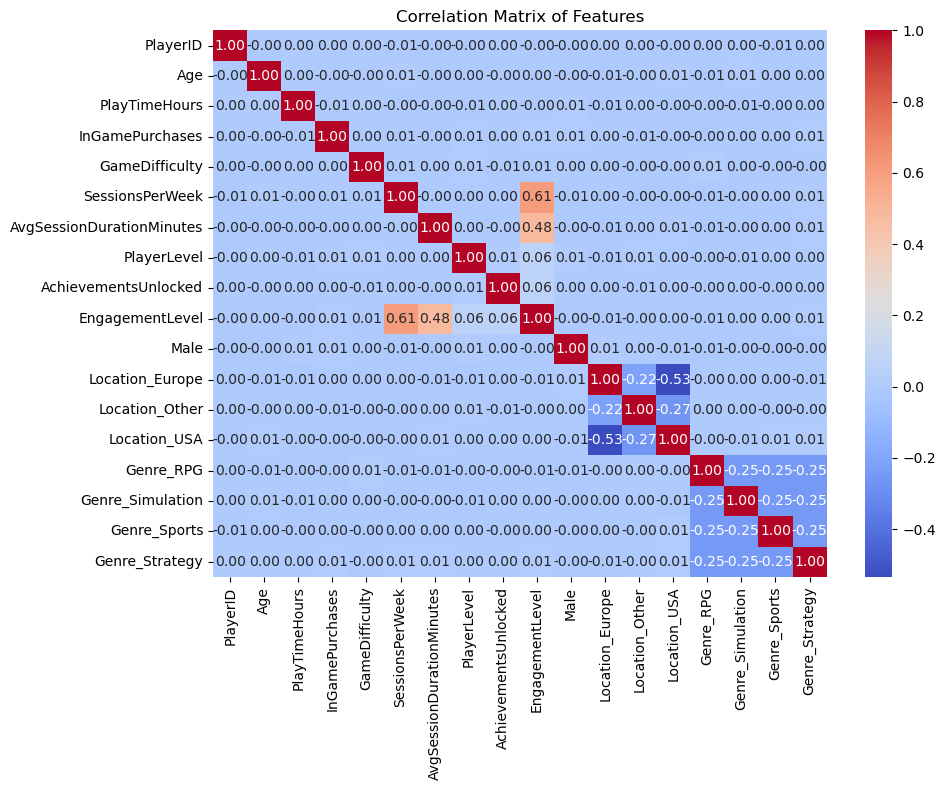

In [103]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Features")
plt.tight_layout()
plt.show()

In [104]:
#strong positive correlations (red) between "SessionsPerWeek" and "AvgSessionDurationMinutes"
# and "EngagementLevel". This aligns with your earlier EDA findings that these features
# are strongly related to engagement

In [105]:
# Group by EngagementLevel and calculate mean values for features
#engagement_correlation = encoded_data.groupby('EngagementLevel').mean().T

engagement_correlation = df.groupby("EngagementLevel").mean().T

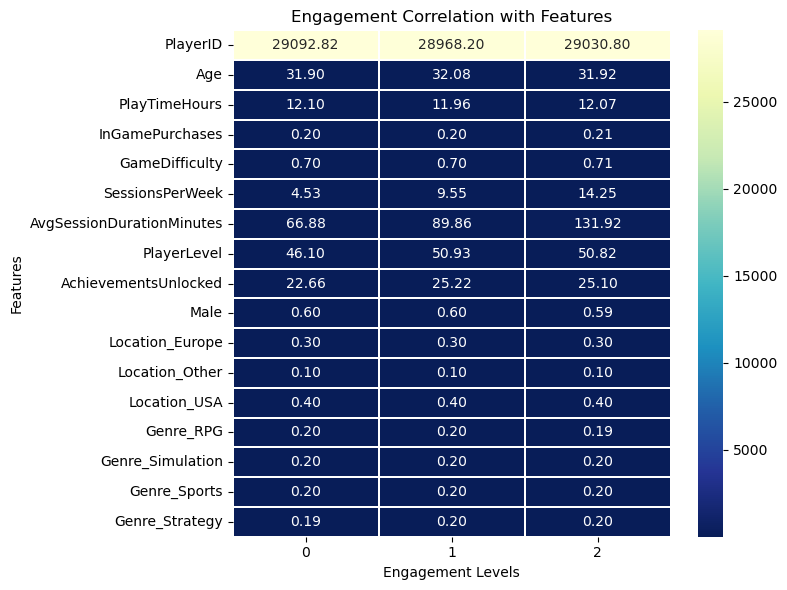

In [106]:
plt.figure(figsize=(8,6))
plt.title("Engagement Correlation with Features")
sns.heatmap(engagement_correlation, linewidth=0.1, cmap="YlGnBu_r", annot=True, fmt=".2f")
plt.xlabel("Engagement Levels")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [107]:
#Drop: PlayerID
#Not useful to pass thorugh to the ml model
#PlayerID is just a unique identifier and doesn't have any inherent meaning related to engagement,
# these high average values for PlayerID across the engagement levels don't indicate a correlation
# or any meaningful relationship with engagement

df.drop("PlayerID", axis=1, inplace=True)

In [108]:
df

,Age,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel,Male,Location_Europe,Location_Other,Location_USA,Genre_RPG,Genre_Simulation,Genre_Sports,Genre_Strategy
0,43,16.271119,0,1,6,108,79,25,1,1,False,True,False,False,False,False,True
1,29,5.525961,0,1,5,144,11,10,1,0,False,False,True,False,False,False,True
2,22,8.223755,0,0,16,142,35,41,2,0,False,False,True,False,False,True,False
3,35,5.265351,1,0,9,85,57,47,1,1,False,False,True,False,False,False,False
4,33,15.531945,0,1,2,131,95,37,1,1,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,32,20.619662,0,0,4,75,85,14,1,1,False,False,True,False,False,False,True
40030,44,13.539280,0,2,19,114,71,27,2,0,False,True,False,False,True,False,False
40031,15,0.240057,1,0,10,176,29,1,2,0,False,False,True,True,False,False,False
40032,34,14.017818,1,1,3,128,70,10,1,1,False,False,True,False,False,True,False


In [109]:
#Splitting Data
#Target = y, Features = X

from sklearn.model_selection import train_test_split

X = df.drop(columns=["EngagementLevel"])

y = df["EngagementLevel"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the splits for verification
print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Testing Target Shape: {y_test.shape}")

Training Features Shape: (32027, 16)
Testing Features Shape: (8007, 16)
Training Target Shape: (32027,)
Testing Target Shape: (8007,)


In [110]:
#Normalise the training data - scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [111]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
#It's crucial that you fit the scaler only on the training data (X_train) to avoid data leakage from the test set

X_test_scaled = scaler.transform(X_test) #test data is scaled in the same way that your training data

#the scaler only performs the transformation using the mean and standard deviation it learned from X_train.
# It does not re-calculate these statistics from the test data, which is how you prevent data leakage

In [112]:
#Model Training and Evaluation:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train_scaled, y_train)

predict_svc = svc.predict(X_test_scaled)

#Determine accuracy of this prediction

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, predict_svc))
print()
print(confusion_matrix(y_test, predict_svc))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86      2065
           1       0.87      0.94      0.91      3875
           2       0.93      0.85      0.89      2067

    accuracy                           0.89      8007
   macro avg       0.90      0.88      0.89      8007
weighted avg       0.89      0.89      0.89      8007


[[1719  296   50]
 [ 135 3651   89]
 [  62  243 1762]]


In [113]:
#90% - good accuacy, but need to evaluate other metrics

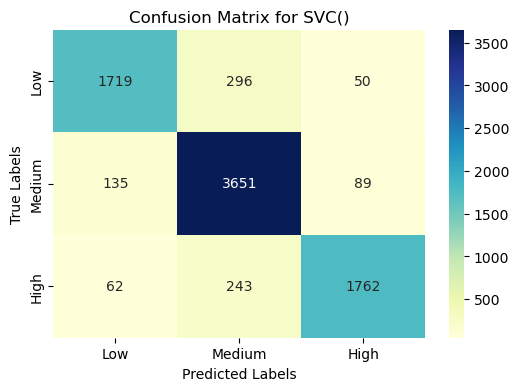

In [114]:
 # Confusion Matrix
cm = confusion_matrix(y_test, predict_svc)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title(f"Confusion Matrix for {svc}")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [116]:
#Models:

models = {"Random Forest" : RandomForestClassifier(random_state=42, class_weight="balanced"),
          "Decision Tree" : DecisionTreeClassifier(random_state=42, class_weight="balanced"),
          "KNN" : KNeighborsClassifier(),
          "SVC" : SVC(random_state=42, probability=True),
          "Logistic Regression" : LogisticRegression(random_state=42, class_weight="balanced"),
          "Gradient Boosting" : GradientBoostingClassifier(random_state=42),
          "LightGMB" : LGBMClassifier(random_state=42, class_weight="balanced", verbose=-1),
          "CatBoost" : CatBoostClassifier(random_state=42, verbose=0)
          }

print(f"Models : ", list(models.keys()))

Models :  ['Random Forest', 'Decision Tree', 'KNN', 'SVC', 'Logistic Regression', 'Gradient Boosting', 'LightGMB', 'CatBoost']


Training & Evaluating: Random Forest
Classification Report for: Random Forest
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      2065
           1       0.91      0.95      0.93      3875
           2       0.93      0.88      0.90      2067

    accuracy                           0.91      8007
   macro avg       0.92      0.90      0.91      8007
weighted avg       0.91      0.91      0.91      8007



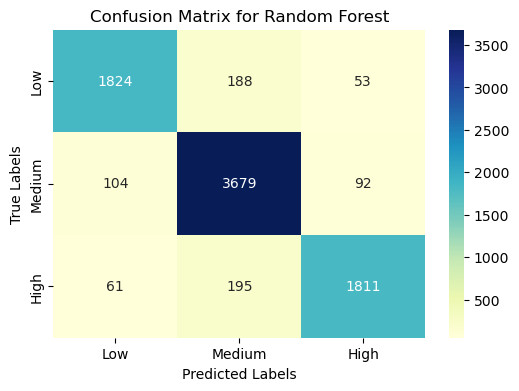

Training & Evaluating: Decision Tree
Classification Report for: Decision Tree
              precision    recall  f1-score   support

           0       0.79      0.80      0.80      2065
           1       0.86      0.86      0.86      3875
           2       0.81      0.80      0.81      2067

    accuracy                           0.83      8007
   macro avg       0.82      0.82      0.82      8007
weighted avg       0.83      0.83      0.83      8007



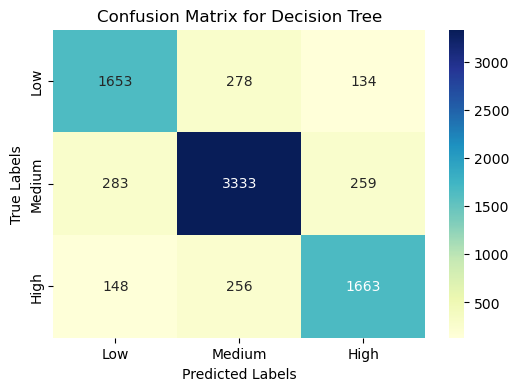

Training & Evaluating: KNN
Classification Report for: KNN
              precision    recall  f1-score   support

           0       0.69      0.55      0.62      2065
           1       0.69      0.82      0.75      3875
           2       0.82      0.69      0.75      2067

    accuracy                           0.72      8007
   macro avg       0.73      0.69      0.70      8007
weighted avg       0.72      0.72      0.71      8007



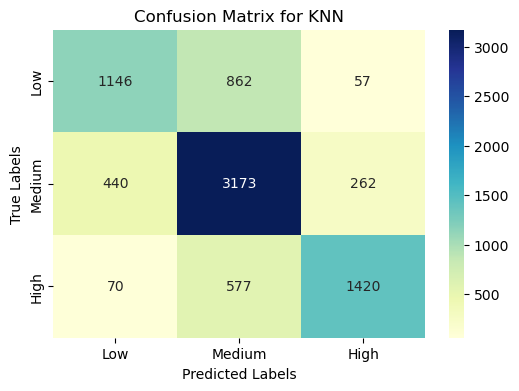

Training & Evaluating: SVC
Classification Report for: SVC
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      2065
           1       0.87      0.94      0.91      3875
           2       0.93      0.85      0.89      2067

    accuracy                           0.89      8007
   macro avg       0.90      0.88      0.89      8007
weighted avg       0.89      0.89      0.89      8007



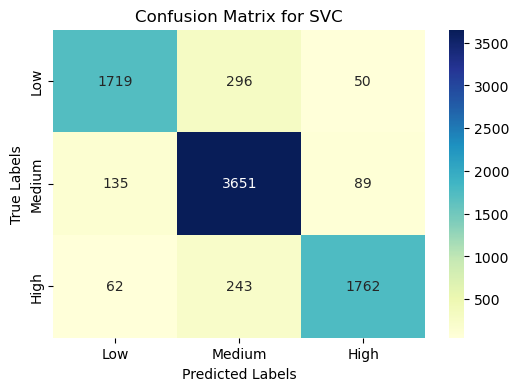

Training & Evaluating: Logistic Regression
Classification Report for: Logistic Regression
              precision    recall  f1-score   support

           0       0.69      0.81      0.74      2065
           1       0.87      0.72      0.79      3875
           2       0.80      0.91      0.85      2067

    accuracy                           0.79      8007
   macro avg       0.78      0.81      0.79      8007
weighted avg       0.80      0.79      0.79      8007



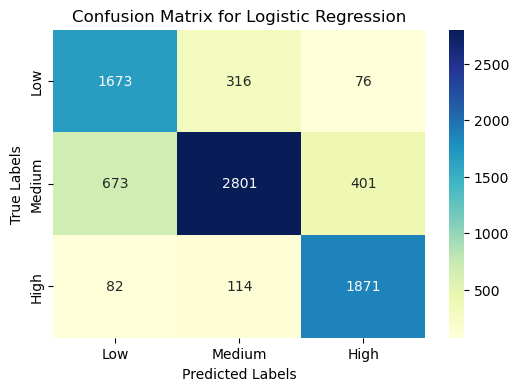

Training & Evaluating: Gradient Boosting
Classification Report for: Gradient Boosting
              precision    recall  f1-score   support

           0       0.91      0.86      0.89      2065
           1       0.90      0.95      0.92      3875
           2       0.92      0.88      0.90      2067

    accuracy                           0.91      8007
   macro avg       0.91      0.90      0.90      8007
weighted avg       0.91      0.91      0.91      8007



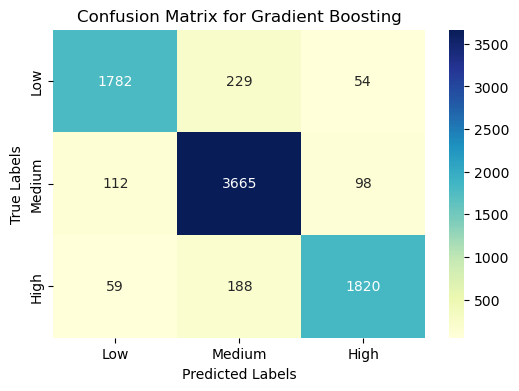

Training & Evaluating: LightGMB
Classification Report for: LightGMB
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      2065
           1       0.92      0.93      0.93      3875
           2       0.92      0.89      0.91      2067

    accuracy                           0.91      8007
   macro avg       0.91      0.91      0.91      8007
weighted avg       0.91      0.91      0.91      8007



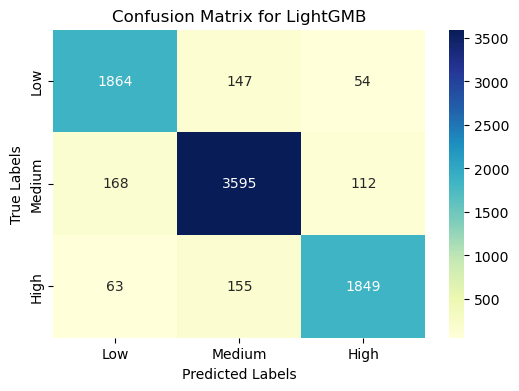

Training & Evaluating: CatBoost
Classification Report for: CatBoost
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      2065
           1       0.92      0.95      0.93      3875
           2       0.93      0.89      0.91      2067

    accuracy                           0.92      8007
   macro avg       0.92      0.91      0.92      8007
weighted avg       0.92      0.92      0.92      8007



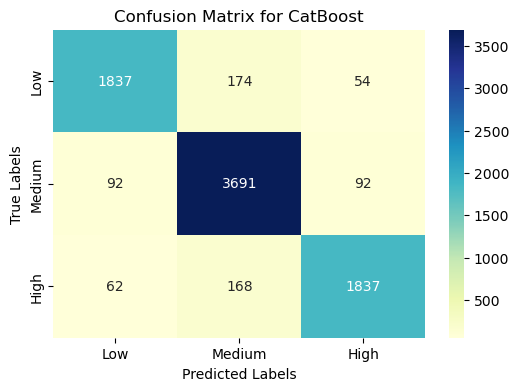

In [119]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

model_results = []
#use .items() to get both the key and value
#.items() returns a list of tuples, where each tuple is (key, value).
#The for key, value in my_dict.items(): loop unpacks each tuple into key and value.s

for model_name, model in models.items():
    print(f"Training & Evaluating: {model_name}")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    #try commuting AUC if model can:
    try:
        if hasattr(model, "predict_proba"):
            y_pred_proba = model.predict_proba(X_test_scaled)
            auc = roc_auc_score(y_test, y_pred_proba, multi_class="ovr") #One vs Rest = #AUC measures the ability of a classifier to distinguish between classes. It represents the degree or measure of separability

        elif hasattr(model, "decision_function"):
            y_scores = model.decision_function(X_test_scaled)
            auc = roc_auc_score(y_test, y_scores, multi_class="ovr")

    except Exception as e:
        print(f"Error calculating AUC for {model_name}: {e}")
        auc = None


    model_results.append({
      "Model": model_name,
      "Accuracy": accuracy,
      "AUC": auc
  })
    print(f"Classification Report for:", model_name)
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

In [120]:
#CatBoost achieved the highest Accuracy

In [121]:
model_results

[{'Model': 'Random Forest',
  'Accuracy': 0.9134507306107156,
  'AUC': 0.9435123657483997},
 {'Model': 'Decision Tree',
  'Accuracy': 0.8303984013987761,
  'AUC': 0.8662049323100568},
 {'Model': 'KNN', 'Accuracy': 0.7167478456350693, 'AUC': 0.8456375569944473},
 {'Model': 'SVC', 'Accuracy': 0.8907206194579743, 'AUC': 0.9433492396100368},
 {'Model': 'Logistic Regression',
  'Accuracy': 0.7924316223304608,
  'AUC': 0.9161452937552625},
 {'Model': 'Gradient Boosting',
  'Accuracy': 0.9075808667416011,
  'AUC': 0.9455048007064178},
 {'Model': 'LightGMB',
  'Accuracy': 0.9127013862869989,
  'AUC': 0.946413481291617},
 {'Model': 'CatBoost',
  'Accuracy': 0.9198201573623079,
  'AUC': 0.9462824306391021}]

In [122]:
results_df = pd.DataFrame(model_results)

In [123]:
results_df

,Model,Accuracy,AUC
0,Random Forest,0.913451,0.943512
1,Decision Tree,0.830398,0.866205
2,KNN,0.716748,0.845638
3,SVC,0.890721,0.943349
4,Logistic Regression,0.792432,0.916145
5,Gradient Boosting,0.907581,0.945505
6,LightGMB,0.912701,0.946413
7,CatBoost,0.919820,0.946282


In [124]:
results_df = results_df.sort_values(by="Accuracy", ascending=False)
results_df.reset_index(drop=True, inplace=True)
results_df

,Model,Accuracy,AUC
0,CatBoost,0.919820,0.946282
1,Random Forest,0.913451,0.943512
2,LightGMB,0.912701,0.946413
3,Gradient Boosting,0.907581,0.945505
4,SVC,0.890721,0.943349
5,Decision Tree,0.830398,0.866205
6,Logistic Regression,0.792432,0.916145
7,KNN,0.716748,0.845638


In [125]:
#summary table

print("\nModel Summary:")
display(results_df)


Model Summary:


,Model,Accuracy,AUC
0,CatBoost,0.919820,0.946282
1,Random Forest,0.913451,0.943512
2,LightGMB,0.912701,0.946413
3,Gradient Boosting,0.907581,0.945505
4,SVC,0.890721,0.943349
5,Decision Tree,0.830398,0.866205
6,Logistic Regression,0.792432,0.916145
7,KNN,0.716748,0.845638


In [126]:
#Accuracy alone can be misleading (a dumb model predicting “Medium” for everyone could score high Accuracy but low AUC).

#AUC is stronger, since it measures whether the model really distinguishes between Low/Medium/High

In [127]:
results_df["AUC"] #obtain series

0    0.946282
1    0.943512
2    0.946413
3    0.945505
4    0.943349
5    0.866205
6    0.916145
7    0.845638
Name: AUC, dtype: float64

In [128]:
auc_max_index = results_df["AUC"].idxmax() #gives index of max value in series

In [129]:
results_df["AUC"][auc_max_index]

0.946413481291617

In [130]:
results_df.loc[auc_max_index, "Model"]

'LightGMB'

In [131]:
best_model_name = results_df.loc[results_df["AUC"].idxmax(), "Model"]

print(f"Best Model based on AUC values: {best_model_name}")
print("\n")

Best Model based on AUC values: LightGMB




In [132]:
best_model = models[best_model_name]

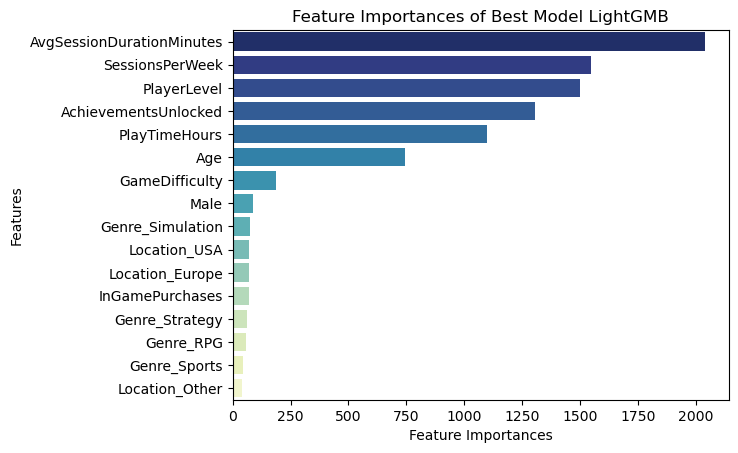

In [133]:
best_model.fit(X_train_scaled, y_train)

#Plot importance features from this model:

if hasattr(best_model, "feature_importances_"):
    feature_importances = best_model.feature_importances_
    feature_names = X.columns
    sorted_idx = feature_importances.argsort()[::-1]
    #plot barchart
    sns.barplot(x=feature_importances[sorted_idx], y=feature_names[sorted_idx], palette="YlGnBu_r")
    plt.title(f"Feature Importances of Best Model {best_model_name}")
    plt.xlabel("Feature Importances")
    plt.ylabel("Features")
    plt.show()
else:
    print(f"The model {best_model_name} does not have feature importances available.")

In [134]:
#Further Evaluation of Models - Using Pipeline and Cross-validation:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

In [135]:
#Column Types:

numerical_features = ["Age","PlayTimeHours","SessionsPerWeek", "AvgSessionDurationMinutes", "PlayerLevel", "AchievementsUnlocked",
                      #feature engineered columns
                      "Male", "Location_Europe", "Location_Other", "Location_USA", "Genre_RPG", "Genre_Simulation", "Genre_Sports", "Genre_Strategy"
                      ]
ordinal_features = ["GameDifficulty"]

In [136]:
#Preprocessing Pipelines

numerical_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

ordinal_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("ord", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))
])

In [137]:
#Preprocessor - ColumnTransformer

preprocessor = ColumnTransformer(transformers=[
    ("num", numerical_pipeline, numerical_features),
    ("ord", ordinal_pipeline, ordinal_features)
])

In [138]:
#Pipelines with top 3 best models from above : CatBoost, LightGMB and RandomForest

lgmb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LGBMClassifier(random_state=42, class_weight="balanced", verbose=-1))
])

catboost_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", CatBoostClassifier(random_state=42, verbose=0))
])

rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(random_state=42, class_weight="balanced"))
])

In [139]:
#Hyperparameter Grids for each model

lgmb_param_grid = {
    "model__n_estimators": [100, 200],
    "model__max_depth": [5, 10, -1],
    "model__learning_rate": [0.05, 0.1]
}

cat_param_grid = {
    "model__iterations": [200, 500],
    "model__depth": [4, 6, 8],
    "model__learning_rate": [0.05, 0.1]
}

rf_param_grid = {
    "model__n_estimators": [100, 200, 500],       # number of trees
    "model__max_depth": [None, 10, 20, 30],       # maximum depth of each tree
    "model__min_samples_split": [2, 5, 10],       # minimum samples to split a node
    "model__min_samples_leaf": [1, 2, 4],         # minimum samples at a leaf node
    "model__max_features": ["sqrt", "log2", None],# number of features considered at each split
    "model__class_weight": ["balanced"]           # handle imbalanced classes
}

In [140]:
#GridSearchCV:

CV_lgmb = GridSearchCV(estimator=lgmb_pipeline, param_grid=lgmb_param_grid, cv=5, n_jobs=-1)

CV_cat = GridSearchCV(estimator=catboost_pipeline, param_grid=cat_param_grid, cv=5, n_jobs=-1)

In [141]:
CV_rf = GridSearchCV(estimator=rf_pipeline, param_grid=rf_param_grid, cv=5, n_jobs=-1, scoring="roc_auc_ovr")

In [142]:
#Fit GridSearch for each model

CV_lgmb.fit(X_train, y_train)

CV_cat.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'PlayTimeHours',
                                                                          'SessionsPerWeek',
                                                                          'AvgSessionDurationMinutes',
                                                                          'PlayerLevel',
                                                                          'AchievementsUnlocked',
                                                                          'Male',
                                                                          'Location_Europe',
                                                                          'Location_Other',
                                                                          'Location_US...
                                                                        ('ord',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('ord',
                                                                                          OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                         unknown_value=-1))]),
                                                                         ['GameDifficulty'])])),
                                       ('model',
                                        <catboost.core.CatBoostClassifier object at 0x00000136CE866AD0>)]),
             n_jobs=-1,
             param_grid={'model__depth': [4, 6, 8],
                         'model__iterations': [200, 500],
                         'model__learning_rate': [0.05, 0.1]})

In [143]:
CV_rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'PlayTimeHours',
                                                                          'SessionsPerWeek',
                                                                          'AvgSessionDurationMinutes',
                                                                          'PlayerLevel',
                                                                          'AchievementsUnlocked',
                                                                          'Male',
                                                                          'Location_Europe',
                                                                          'Location_Other',
                                                                          'Location_US...
                                                                         ['GameDifficulty'])])),
                                       ('model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'model__class_weight': ['balanced'],
                         'model__max_depth': [None, 10, 20, 30],
                         'model__max_features': ['sqrt', 'log2', None],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [100, 200, 500]},
             scoring='roc_auc_ovr')

In [144]:
#Function to Evaluate each model:

CV_results = []

def evaluate_model(grid_search, X_test, y_test, model_name):
    best_model = grid_search.best_estimator_ #refinded model with best hyperparmaters found during GridSearchCV
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba, multi_class="ovr")

    print(f"Using Model : {model_name}")
    print("Best Params:", grid_search.best_params_)
    print("Best Score (AUC):", grid_search.best_score_)
    print("Test Accuracy:", acc)
    print("Test AUC:", auc)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    CV_results.append({

          "Model": model_name,
          "Accuracy": acc,
          "AUC": auc

  })

Using Model : LightGMB
Best Params: {'model__learning_rate': 0.1, 'model__max_depth': -1, 'model__n_estimators': 200}
Best Score (AUC): 0.9112935155688107
Test Accuracy: 0.9135756213313351
Test AUC: 0.9465332980940144

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.90      2065
           1       0.92      0.93      0.93      3875
           2       0.92      0.89      0.91      2067

    accuracy                           0.91      8007
   macro avg       0.91      0.91      0.91      8007
weighted avg       0.91      0.91      0.91      8007



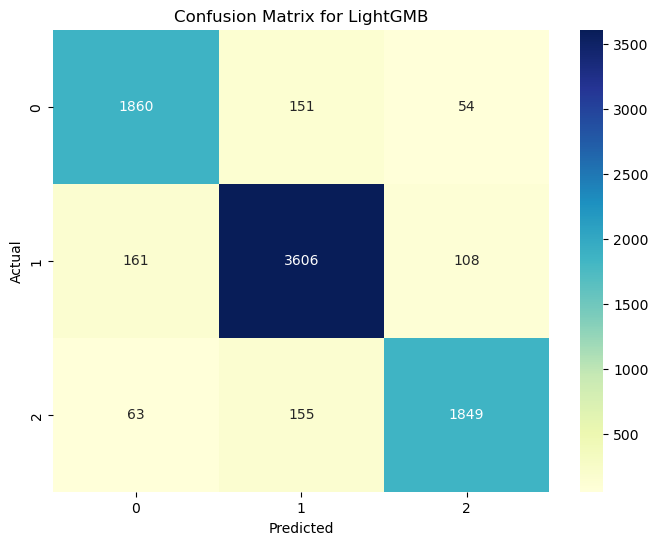

In [145]:
evaluate_model(CV_lgmb, X_test, y_test, "LightGMB")

Using Model : CatBoost
Best Params: {'model__depth': 6, 'model__iterations': 500, 'model__learning_rate': 0.05}
Best Score (AUC): 0.9181003367500657
Test Accuracy: 0.9223179717746971
Test AUC: 0.9456108053619717

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.89      0.91      2065
           1       0.92      0.96      0.94      3875
           2       0.93      0.89      0.91      2067

    accuracy                           0.92      8007
   macro avg       0.92      0.91      0.92      8007
weighted avg       0.92      0.92      0.92      8007



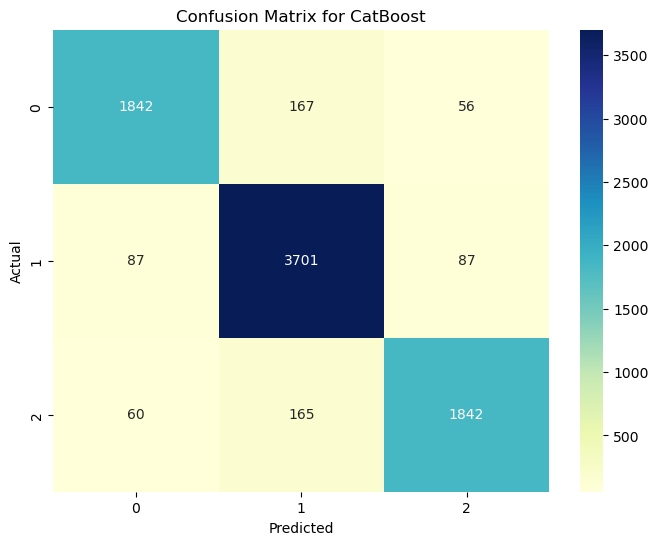

In [146]:
evaluate_model(CV_cat, X_test, y_test, "CatBoost")

Using Model : RandomForest
Best Params: {'model__class_weight': 'balanced', 'model__max_depth': 10, 'model__max_features': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 100}
Best Score (AUC): 0.944541787419201
Test Accuracy: 0.9153240914200075
Test AUC: 0.9459311175968949

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      2065
           1       0.91      0.94      0.93      3875
           2       0.93      0.89      0.91      2067

    accuracy                           0.92      8007
   macro avg       0.92      0.91      0.91      8007
weighted avg       0.92      0.92      0.92      8007



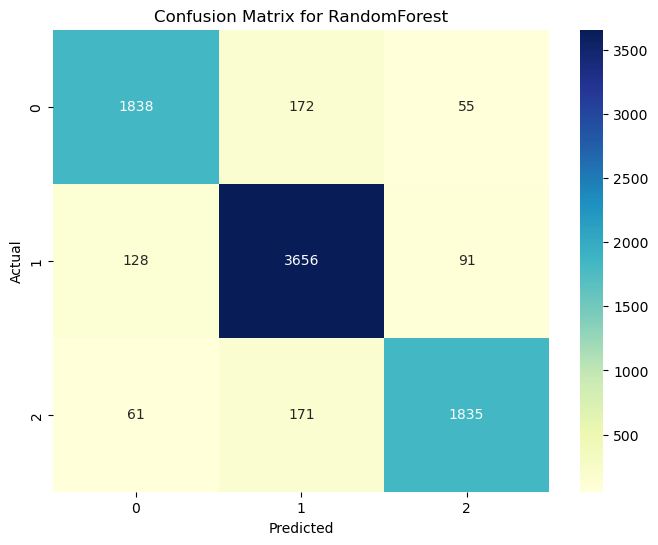

In [147]:
evaluate_model(CV_rf, X_test, y_test, "RandomForest")